#### Handling Imbalance dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a random imbalanced data set
sample_size = 1000
class_0_ratio = 0.87
class_1_ratio = 1 - class_0_ratio
class_0_sample_size = int(sample_size * class_0_ratio)
class_1_sample_size = int(sample_size * class_1_ratio)

class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size = class_0_sample_size),
    'feature_2' : np.random.normal(loc=0, scale=1, size = class_0_sample_size),
    'target' : [0] * class_0_sample_size
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=3, scale=1, size = class_1_sample_size),
    'feature_2' : np.random.normal(loc=2, scale=1, size = class_1_sample_size),
    'target' : [1] * class_1_sample_size
})

In [3]:
# Concat two data frames and reset the index.
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [4]:
df['target'].value_counts()

target
0    870
1    130
Name: count, dtype: int64

##### 1. UpSampling
* Upsampling refers to manually adding data samples to the minority classes in order to create a more balanced dataset.

In [5]:
# Divide data set into two parts for target 0 and target 1
majority = df[df['target'] == 0]
print(majority.shape)
minority = df[df['target'] == 1]
print(minority.shape)

(870, 3)
(130, 3)


In [6]:
# Import resample module from sklearn
from sklearn.utils import resample

In [7]:
# Upsample the minority dataset

# Replace True means that during resampling, the same data point from the minority class can be selected multiple times
minority_upsampled = resample(minority,
                              replace=True, 
                              n_samples = len(majority),
                              random_state = 42)

minority_upsampled
# Observe that index is repeated meaning duplications of existiung records

,feature_1,feature_2,target
972,1.918254,3.351420,1
962,5.443277,1.083527,1
884,2.865615,2.524518,1
976,3.075186,2.669407,1
941,1.013500,3.372790,1
...,...,...,...
983,2.955872,2.808389,1
932,2.314846,4.276503,1
998,4.536059,0.346980,1
877,3.426267,2.391853,1


In [8]:
# Concate majority data and upsampled minority data
upsampled_df = pd.concat([majority, minority_upsampled]).reset_index(drop=True)
upsampled_df['target'].value_counts()

target
0    870
1    870
Name: count, dtype: int64

##### 2. Downsampling
* Downsampling refers to removing records from majority classes in order to create a more balanced dataset. 
* The simplest way of downsampling majority classes is by randomly removing records from that category. 

In [9]:
# Downsample majority data

''' When replace is set to False, it means that during resampling, 
each data point from the minority class can be selected only once.
'''
majority_downsampled = resample(majority,
                               replace= False,
                               n_samples=len(minority),
                               random_state=42)
majority_downsampled.shape

(130, 3)

In [10]:
# Concatenate downsampled majority dataset and minority dataset
downsampled_df = pd.concat([majority_downsampled, minority]).reset_index(drop=True)
downsampled_df['target'].value_counts()

target
0    130
1    130
Name: count, dtype: int64

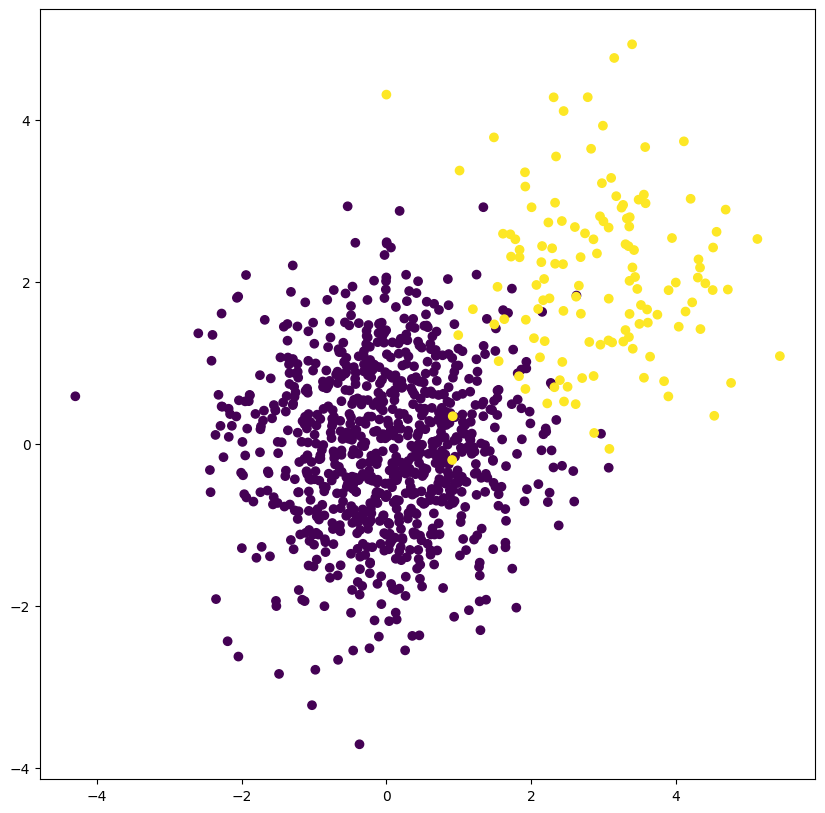

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'])
plt.show()

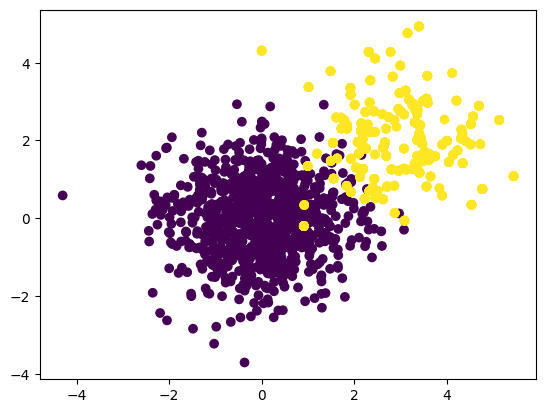

In [19]:
plt.scatter(upsampled_df['feature_1'], upsampled_df['feature_2'], c=upsampled_df['target'])
plt.show()